>Below is a copied and translated version of seaborn tutorial (v0.12.2) from the seaborn official docs.
>
>해당 내용은 seaborn 공식 문서에서 제공하는 seaborn 튜토리얼(v0.12.2)의 단순 필사 및 번역본입니다.  
>     
> © Copyright 2012-2022, Michael Waskom. (https://seaborn.pydata.org/tutorial/)


# seaborn에서 사용가능한 data structure
Data structures accepted by seaborn

seaborn은 데이터 시각화 라이브러리이기 때문에 우리가 데이터를 넣어줘야 합니다. 이번 챕터에서는 데이터를 넘겨주는 여러 방법에 대해 알아볼 것입니다. seaborn은 여러 종류의 데이터 형식(format)을 지원합니다. 대부분의 함수는 python 내장 타입뿐만 아니라 pandas, numpy 라이브러리의 객체까지 지원합니다. 이 데이터들의 사용 패턴과 그에 맞는 옵션까지 이해하면 거의 모든 데이터 형식을 원하는 시각화로 표현해낼 수 있을 겁니다.

현재 이 글(v0.11.0 기준)에서 다루는 모든 옵션은 seabon 모듈(구체적으로는 relational, distribution mudule)의 하위집단(subset)에서만 지원됩니다. 다른 모듈들도 마찬가지로 유연하지만 몇 가지 예외사항(ex. catplot()과 lmplot()은변수로 명명된 long-form data로 제한됨)이 있습니다. 

데이터 입력(ingest) 코드는 이후 버전에서 이런 모듈들도 표준화될 예정입니다. 그 때까지는 데이터를 넘겨줄 때 잘 작동하지 않는다면 각 함수의 공식문서를 참고해주세요.

## 1. 데이터테이블 형식 : Long-form vs. wide-form
Long-form vs. wide-form data

seaborn 함수는 대부분 데이터의 벡터를 지향합니다. y에 대해 x를 표시(plot)할 때, 각 변수는 벡터값이 되어야 합니다. seaborn은 두 개 이상의 벡터가 표 형식(tabular fashion)으로 구성된 데이터셋을 받습니다. 'long-form'과 'wide-form' 데이터테이블은 근본적인 차이가 있으므로, seaborn도 받아들인 데이터셋의 formd에 따라 다루는 방법이 달라집니다.

### Long-form 데이터 형식
Long-form data

long-form 데이터 테이블은 이런 특징을 갖습니다 :
* 각 변수는 열(column)이 됩니다.
* 개별 관측치는 행(row)이 됩니다. 

long-form 데이터 테이블의 예로 이전에 다뤘던 "flights" 데이터셋을 들 수 있습니다. 이 데이터셋은 1940-1960년 매 월 탑승자 수를 나타내고 있습니다. 여기는 3개의 변수가 들어있습니다 : year(연도), month(월), number of passengers(승객수)

In [1]:
import seaborn as sns
sns.set_theme()
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


long-form 데이터에서 각 컬럼은 plot의 변수 중 하나로 할당(명시)할 수 있습니다. 예를 들어, 월간 승객수를 나타내는 plot은 다음과 같습니다 :

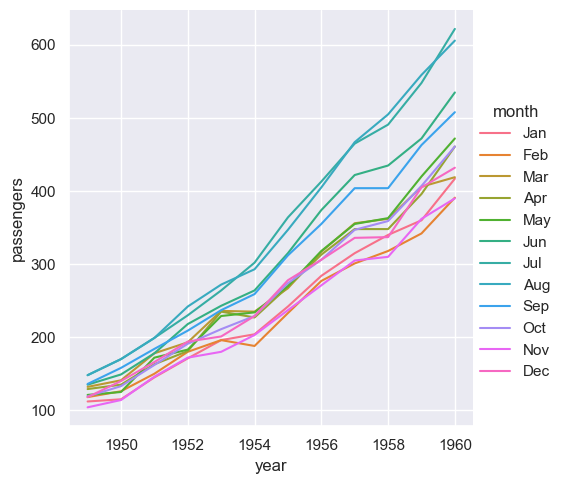

In [2]:
sns.relplot(data=flights, x="year", y="passengers", hue="month", kind="line");

long-form 데이터의 장점은 plot에서의 명시성 입니다. 임의의 복잡한 데이터셋에서도 변수와 관측치를 명확하게 정의하여 받아들입니다. 하지만 일반적으로 생각하는 데이터의 형식과는 달라서 처음에는 익숙치 않을 수 있습니다.

### Wide-form 데이터 형식
Wide-form data  

간단한 데이터셋의 경우 (행, 열에 각기 다른 변수의 레벨 및 범위를 담는)스프레드시트 같은 형태가 더 직관적일 수 있습니다. 
'flights' 데이터셋을 예로 들자면, 각 연도(year)별 월(month)에 따른 수치를 보기 위해 wide-form으로 "피봇팅(pivoting)" 할 수 있습니다.

In [6]:
flights_wide = flights.pivot(index='year', columns='month', values='passengers')
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


변수가 3가지(year, month, passengers)인 것은 마찬가지이지만, 이제 배치가 다르게 되었습니다. 이 데이터셋에서의 변수는 named-field가 아니라 데이블 차원에서 연결됩니다. 각 관측치는 셀의 값과 테이블에서의 좌표(행열 인덱스)로 정의됩니다. 

long-form 데이터에서는 변수의 이름을 알면 접근할 수 있었지만, wide-form 데이터에서는 그럴 수 없습니다. 그럼에도 불구하고, 테이블에서 변수와 차원의 관계가 명확하기 때문에 seaborn에서도 그림에 변수를 바로 할당할 수 있습니다.

! Note  
Seaborn 은 `x`와 `y`가 입력(assigned)되지 않으면 `data`를 wide-form 으로 취급합니다.

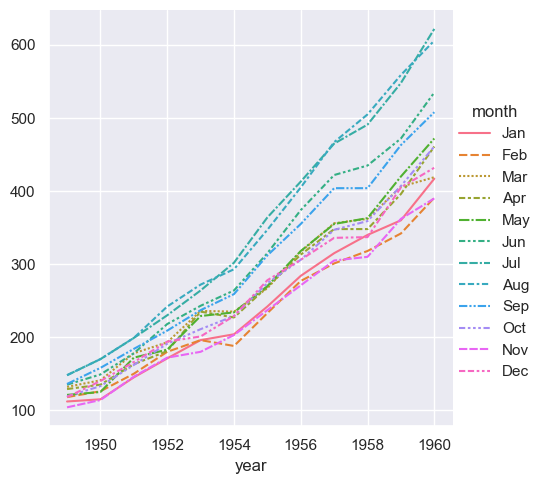

In [4]:
# wide-form 데이터로 plot  =>  x, y도 할당하지 않고, style, hue도 넣지 않았는데 알아서 해줌.
sns.relplot(data=flights_wide, kind='line');

이번 플롯에서 seaborn은 데이터프레임(flights_wide)의 인덱스(year)를 `x`에, 데이터프레임의 값(value)을 `y`에 할당했고, 각 월(month)마다 별도의 라인을 그렸습니다. 바로 전의 플롯과 굉장히 비슷하게 생겼지만 확연한 차이점이 있습니다. 데이터셋이 long-form에서 wide-form으로 "피봇(pivot)"과정을 거치면서 값(value)이 의미하는 정보가 사라졌고, 따라서 y축 레이블이 없어졌습니다. (그리고 라인이 점선으로 되어 있는데, 이건 `relplot()`에서 plot이 더 잘 보이도록 자동으로 column 변수를 `hue`와 `style` 모두에 맵핑했기 때문입니다. long-form 데이터에서는 `style='month'`를 설정해주면 비슷한 효과를 낼 수 있었습니다.)
<br></br>  
결과적으로, 위에서 우리는 wide-form 데이터를 이용할 때 더 적은 라인의 코드를 사용했습니다. 더 쉬워보이죠!   

하지만 long-form 데이터도 그만한 장점이 있습니다. long-form 데이터는 처음에 올바른 포맷(형식)으로 만들어두면 더이상 데이터의 구조에 대해 신경쓸 필요가 없어집니다. 플롯을 그릴 때도 어떤 변수를 가져와서 그릴지만 생각하면 됩니다. 예를 들어, 각 연도의 월별 시계열을 나타내는 선을 그리려면 변수를 그에 맞게 다시 할당해주기만 하면 됩니다.

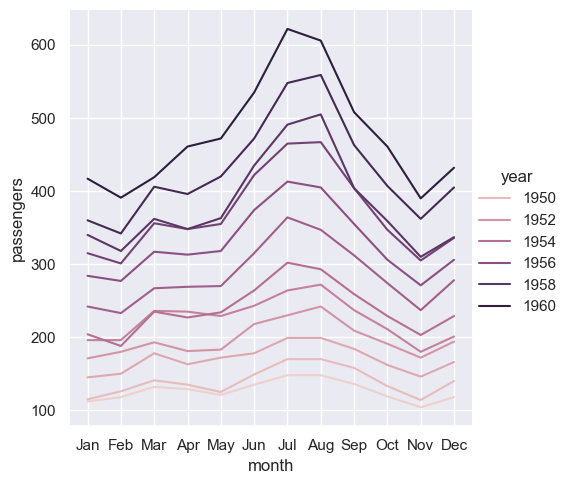

In [5]:
sns.relplot(data=flights, x='month', y='passengers', hue='year', kind='line');

위의 wide-form 데이터셋을 맵핑해서 비슷한 결과를 만드려면 테이블을 transpose하면 됩니다.

In [6]:
flights_wide.T.head(3)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419


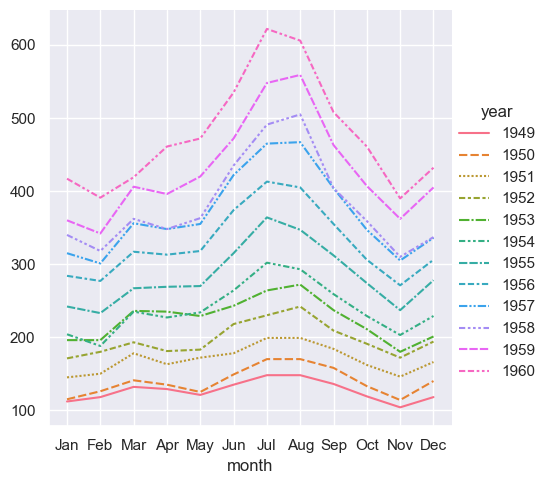

In [7]:
sns.relplot(data=flights_wide.T, kind='line');

예시를 통해 알 수 있는 사실이 또 있습니다. (현재의) seaborn은 wide-form 데이터셋에서 컬럼 변수를 데이터타입에 관계없이 범주형(categorical)으로 취급합니다. 반면, long-form 데이터셋에서는 변수가 연속형(숫자;numeric)이기 때문에 정량적인 color palette와 범례가 할당되었습니다. 
(wide-form에서는 빨주노초파남보 vs long-form에서는 그라데이션 컬러) 이 점은 향후 변경될 수도 있습니다.
  
이렇게 변수에 명시적 할당이 없다는 것은 각 plot type마다 wide-form 데이터의 dimension에 맞게 plot의 역할을 fixed mapping 으로 정의해야한다는 것을 의미합니다. 이런 자동(natural) mapping은 (플롯 타입에 따라 약간의 차이가 있지만) wide-form 데이터를 사용할 경우 결과물을 예측하기 어려워집니다. 예를 들어, 범주형 플롯(categorical plot)은 테이블의 컬럼(column)을 x에 할당하고, 행 전체에 걸쳐 집계(aggregate)합니다. 이 때 인덱스 번호는 무시됩니다.

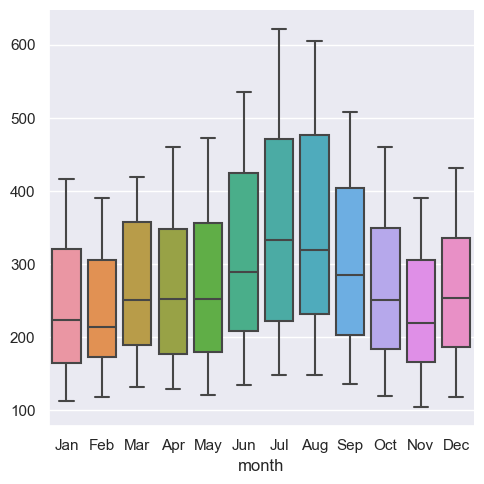

In [9]:
sns.catplot(data=flights_wide, kind='box');

Pandas로 wide-form 데이터를 나타낼 때는 변수의 개수가 3개 이하로 제한됩니다. Pandas에서는 추가적인 변수를 표에서 multi-index를 통해 표현하는데, seaborn에서는 이 multi-index 정보를 사용하지 않기 떄문입니다.

`xarray`프로젝트(레이블이 지정된 N차원 배열객체를 제공)를 통해 더 높은 차원의 wide-form 데이터를 일반화하는 방법도 있기는 합니다. 현재 seabron에서 이 `xarray`객체를 직접 지원하지는 않지만, `xarray`객체를 `to_pandas` 메서드를 통해 long-form `pandas.DataFram`형태로 바꾼 후, seaborn에서 다른 long-form 데이터셋처럼 플롯할 수 있습니다.

요약하자면, long-form과 wide-form 데이터셋을 이렇게 보면 됩니다.  
<br>
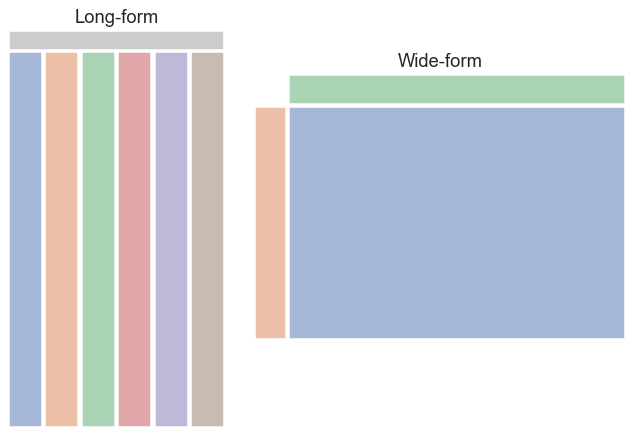

### 깔끔하지 않은 데이터
Messy data

데이터셋을 명확하게 long-form, wide-form 으로 구별하기 어려운 경우가 많습니다. long-form 이나 wide-form으로 명확하게 구별되는 데이터셋을 "깔끔하다(tidy)", 구별하기 어려운 데이터셋을 "지저분하다(messy)" 정도로 표현할 수 있겠습니다. messy 데이터셋의 변수는 고유한 키(key)값이나 표에서의 좌표(dimension)값으로 정의되지 않습니다. 

이런 일은 반복측정 데이터(repeated-measures data)에서 자주 일어납니다. 각 행(row)은 데이터 수집 단위에 해당하기 때문에 이런 테이블이 자연스럽게 만들어지게 됩니다. 아래의 간단한 정신학적 실험 데이터셋을 예로 봅시다. 20명의 피실험자는 주의력 상태에 따라 애너그램 기억 과제를 수행했습니다.


In [9]:
anagrams = sns.load_dataset('anagrams')
anagrams

,subidr,attnr,num1,num2,num3
0,1,divided,2,4.0,7
1,2,divided,3,4.0,5
2,3,divided,3,5.0,6
3,4,divided,5,7.0,5
4,5,divided,4,5.0,8
5,6,divided,5,5.0,6
6,7,divided,5,4.5,6
7,8,divided,5,7.0,8
8,9,divided,2,3.0,7
9,10,divided,6,5.0,6


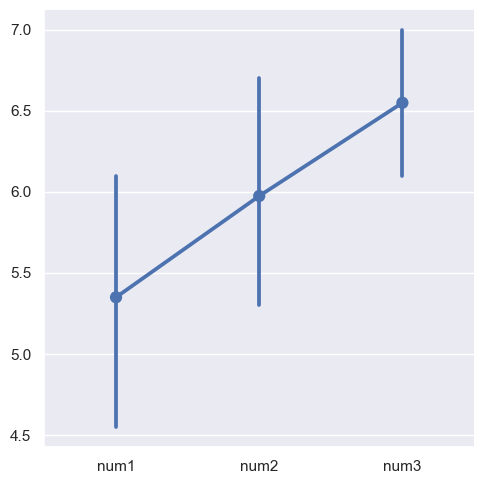

In [25]:
sns.catplot(data=anagrams.iloc[:,1:], kind='point');
# 여기서는 x, y 값을 지정하지 않았음. => seaborn이 알아서 mapping => hue에 변수를 지정할 수 없음.

여기서 주의도(attnr)는 집단간 비교(between-subject)변수입니다. 애너그램에 대한 답안(num1, num2, num3)은 집단내 비교(within-subject)변수입니다. 종속변수(dependent measure)는 기억력 점수(memory performance)입니다. 이 두 변수(숫자와 점수)가 컬럼에 따라 연결돼서 부호화(encoded)됩니다. 결과적으로, 이렇게 만들어진 전체 데이터셋은  명확하게 long-form, wide-form으로 구분하기 어렵습니다.

만약 정답의 개수, 주의력 이 2가지를 계산해서 평균점수로 seaborn에 플롯하고 싶다면 어떻게 해야할까요? 먼저, 데이터를 강제로 우리의 깔끔한(tidy) 형태(long-form, wide-form) 중 하나로 바꿔야 합니다. 여기서는 long-form 형태로 바꿔보겠습니다. 각 변수는 column에, 관측치는 row에 표현될 것입니다. 그러려면 `pandas.DataFrame.melt()` 메서드를 사용하면 됩니다 :

In [14]:
anagrams_long = anagrams.melt(id_vars=['subidr', 'attnr'],
                              var_name="solutions",
                              value_name = "score")
anagrams_long[::10]

,subidr,attnr,solutions,score
0,1,divided,num1,2.0
10,11,focused,num1,6.0
20,1,divided,num2,4.0
30,11,focused,num2,5.0
40,1,divided,num3,7.0
50,11,focused,num3,6.0


이제는 우리가 원하는 plot을 만들 수 있습니다.

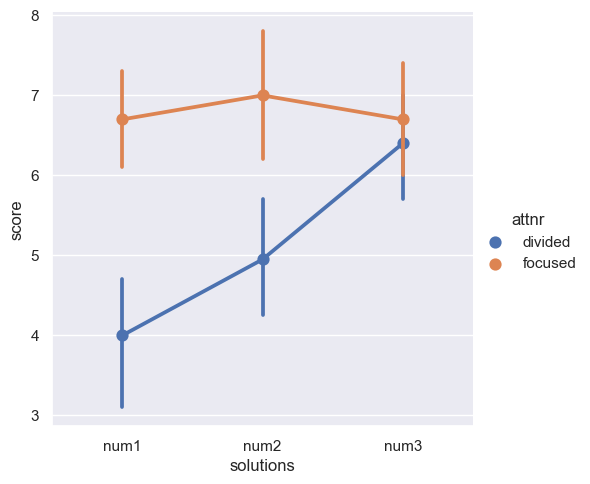

In [28]:
sns.catplot(data=anagrams_long, x='solutions', y='score', hue='attnr', kind='point');

### 더 알아보면 좋은 내용
Further reading and take-home points


표 형식(tabular)의 데이터 구조에 대해 더 알아보고 싶다면 Hadley Wickham의 "Tidy Data"라는 글을 읽어보세요. 위 글에서 정의하는 개념과 seaborn에서 사용하는 개념에 약간의 차이가 있음을 주의해서 봐주세요. 글에서는 '깔끔한(tidy) 데이터'를 long-form 형태라고 정의합니다. 이와 달리, 우리는 변수나 테이블 좌표에 따른 명확한 맵핑이 가능한 경우 'tidy wide-form data', 맵핑이 존재하지 않는 경우 'messy data'로 구분했습니다. 


long-form 데이터 구조는 확실한 장점이 있습니다. figure를 만들 때 dataset의 변수를 plot의 기능에 명시적으로 할당할 수 있고, 3개 이상의 변수를 사용할 수도 있습니다. 중요한 분석을 시작할 때는 가능하다면 data를 long-form 형태로 나타내도록 해보세요. seaborn documentation에서의 대부분 예제도 long-form data를 기준으로 제공될 것입니다. 

반대로 wide-form 형태로 두는 것이 더 자연스러울 때도 있을 수 있습니다. 그럴 때도 seaborn에서 표현할 수 있는 방법이 있다는 것을 기억해두세요.

## 2. long-form 데이터 시각화 옵션
Options for visualizing long-form data

While long-form data has a precise definition, seaborn is fairly flexible in terms of how it is actually organized across the data structures in memory.
